<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Check the number of rows and columns.

In [4]:
# Answer:
rows = movies.shape[0]
print ('rows =', rows)

rows = 979


In [5]:
# Answer:
columns = movies.shape[1]
print ('columns = ', columns)

columns =  6


#### Check the data type of each column.

In [6]:
# Answer:

movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


In [7]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [8]:
# Answer:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [9]:
# Answer:
shortest_movie = movies.groupby('title')['duration'].max().sort_values(ascending = True).head(1)
shortest_movie

title
Freaks    64
Name: duration, dtype: int64

In [10]:
# Answer: 
longest_movie = movies.groupby('title')['duration'].max().sort_values(ascending = False).head(1)
longest_movie

title
Hamlet    242
Name: duration, dtype: int64

#### Create a histogram of duration, choosing an "appropriate" number of bins.

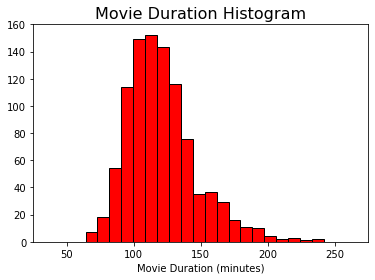

In [11]:
# Answer:
movies['duration'].hist(color = 'red', edgecolor = 'black', bins = 20, grid = False)
plt.xlim(25, 275)
plt.ylim(0, 160)
plt.title('Movie Duration Histogram', fontsize = 16)
plt.xlabel('Movie Duration (minutes)');


#### Use a box plot to display that same data.

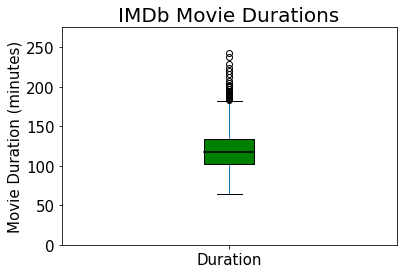

In [12]:
# Answer:
medianprops = dict(color="black",linewidth=1.5)


movies.boxplot(column = ['duration'], grid = False, fontsize = 15, patch_artist = True, medianprops=medianprops, 
               boxprops=dict(color = 'black', facecolor = 'green'))
plt.ylim([0, 275])
plt.xticks([1], ['Duration'])
plt.ylabel('Movie Duration (minutes)', fontsize = 15)
plt.title('IMDb Movie Durations', fontsize = 20);



## Intermediate level

#### Count how many movies have each of the content ratings.

In [13]:
# Answer:
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

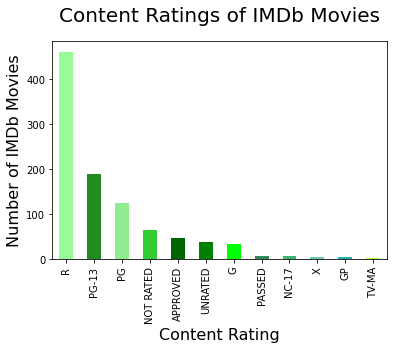

In [14]:
# Answer:


#First method 
movies['content_rating'].value_counts().plot(kind = 'bar', color = ['palegreen', 'forestgreen', 'lightgreen', 
                                                                    'limegreen', 'darkgreen', 'green',
                                                                   'lime', 'seagreen', 'mediumseagreen',
                                                                   'mediumaquamarine', 'lightseagreen', 'greenyellow'])
plt.xlabel('Content Rating', fontsize = 16)
plt.ylabel('Number of IMDb Movies', fontsize = 16)
plt.title('Content Ratings of IMDb Movies', fontsize = 20, pad = 20);







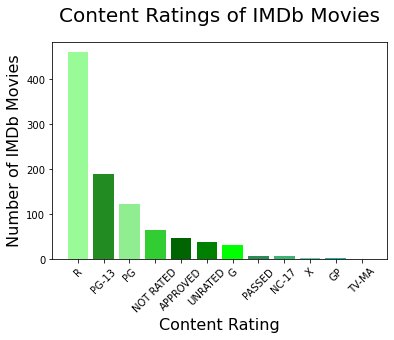

In [34]:
# Answer: 

#Second method 

content = movies['content_rating'].value_counts()

plt.bar(content.index, content.values, color = ['palegreen', 'forestgreen', 'lightgreen', 
                                                                    'limegreen', 'darkgreen', 'green',
                                                                   'lime', 'seagreen', 'mediumseagreen',
                                                                   'mediumaquamarine', 'lightseagreen', 'greenyellow']);

plt.xticks(rotation = 45)

plt.xlabel('Content Rating', fontsize = 16)
plt.ylabel('Number of IMDb Movies', fontsize = 16)
plt.title('Content Ratings of IMDb Movies', fontsize = 20, pad = 20);



#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [15]:
# Answer:

movies['content_rating'].replace({'NOT RATED': 'UNRATED', 'APPROVED': 'UNRATED', 'PASSED': 'UNRATED', 'GP': 'UNRATED'},
                                inplace = True)

movies['content_rating'].value_counts()



R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [16]:
# Answer:

movies['content_rating'].replace({'X': 'NC-17', 'TV-MA': 'NC-17'}, inplace = True)

movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [17]:
# Answer:

movies.apply(lambda x: x.isnull().sum())

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [18]:
# Answer: 

movies[movies.isnull().any(axis = 1)] 

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [19]:
# Answer:

movies['content_rating'] = np.where(movies['title'] == 'Butch Cassidy and the Sundance Kid', 'PG', movies['content_rating'])

movies.iloc[187]


star_rating                                                     8.2
title                            Butch Cassidy and the Sundance Kid
content_rating                                                   PG
genre                                                     Biography
duration                                                        110
actors_list       [u'Paul Newman', u'Robert Redford', u'Katharin...
Name: 187, dtype: object

In [20]:
movies['content_rating'] = np.where(movies['title'] == 'Where Eagles Dare', 'PG', movies['content_rating'])

movies.iloc[649]

star_rating                                                     7.7
title                                             Where Eagles Dare
content_rating                                                   PG
genre                                                        Action
duration                                                        158
actors_list       [u'Richard Burton', u'Clint Eastwood', u'Mary ...
Name: 649, dtype: object

In [21]:
movies['content_rating'] = np.where(movies['title'] == 'True Grit', 'PG-13', movies['content_rating'])

movies.iloc[936]

star_rating                                                   7.4
title                                                   True Grit
content_rating                                              PG-13
genre                                                   Adventure
duration                                                      128
actors_list       [u'John Wayne', u'Kim Darby', u'Glen Campbell']
Name: 936, dtype: object

In [22]:
movies.apply(lambda x: x.isnull().sum())

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [23]:
# Answer:

long_rating = movies[movies['duration'] >= 120]['star_rating'].mean()

long_rating

7.948898678414082

In [24]:
#Answer: 

short_rating = movies[movies['duration'] < 120]['star_rating'].mean()

short_rating

7.838666666666657

In [25]:
# Comparison 

star_rating_long_v_short = long_rating - short_rating 

print('Star rating difference between long and short movies:', star_rating_long_v_short)

Star rating difference between long and short movies: 0.11023201174742514


#### Use a visualization to detect whether there is a relationship between duration and star rating.

In [26]:
# Answer:

X = movies[['duration']]
y = movies['star_rating']


In [27]:
#Instantiate the model 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [28]:
lr.fit(X, y)

LinearRegression()

In [29]:
#Make predictions

yhat = lr.predict(X)


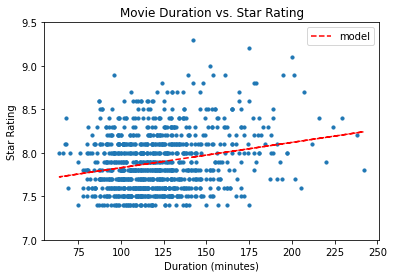

In [30]:
plt.scatter(X, y, s = 10)

plt.plot(movies['duration'], yhat, '--r', label = 'model')
plt.ylim([7.00, 9.50])
plt.title('Movie Duration vs. Star Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Star Rating')
plt.legend();

#Seems to be a slightly positive correlation between movie duration and rating

In [31]:
#Interested to also see the MSE 

from sklearn.metrics import mean_squared_error

mean_squared_error(y, yhat)

0.107005708332056

#### Calculate the average duration for each genre.

In [32]:
# Answer:

movies.groupby('genre')['duration'].mean()


        
        
        

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

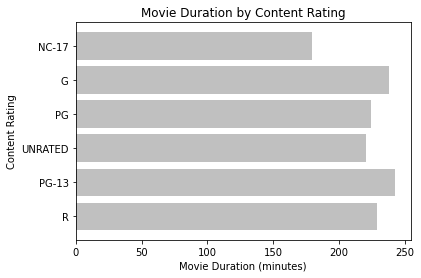

In [33]:
# Answer:

plt.barh(movies['content_rating'], width = movies['duration'], color = 'silver')
plt.title('Movie Duration by Content Rating')
plt.ylabel('Content Rating')
plt.xlabel('Movie Duration (minutes)');

#### Determine the top rated movie (by star rating) for each genre.

In [34]:
# Answer:

movies.groupby('genre').max()

,star_rating,title,content_rating,duration,actors_list
genre,,,,,
Action,9.0,Yojimbo,UNRATED,205,"[u'Ziyi Zhang', u'Takeshi Kaneshiro', u'Andy L..."
Adventure,8.9,True Grit,UNRATED,224,"[u'Yves Montand', u'Charles Vanel', u'Peter va..."
Animation,8.6,Wreck-It Ralph,UNRATED,134,"[u'Y\xf4ji Matsuda', u'Yuriko Ishida', u'Y\xfb..."
Biography,8.9,Walk the Line,UNRATED,202,"[u'Will Smith', u'Thandie Newton', u'Jaden Smi..."
Comedy,8.6,Zombieland,UNRATED,187,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
Crime,9.3,Zodiac,UNRATED,229,"[u'Yeong-ae Lee', u'Min-sik Choi', u'Shi-hoo K..."
Drama,8.9,Zulu,UNRATED,242,"[u'William Holden', u'Gloria Swanson', u'Erich..."
Family,7.9,Willy Wonka & the Chocolate Factory,PG,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
Fantasy,7.7,The City of Lost Children,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [35]:
# Answer:

movies.duplicated(subset=['title'])

0      False
1      False
2      False
3      False
4      False
       ...  
974    False
975    False
976    False
977    False
978    False
Length: 979, dtype: bool

In [36]:
movies.apply(lambda x: x.duplicated().sum())['title']

4

In [37]:
#The movies are not actually duplicates 

movies[movies.duplicated(subset=['title'])]

,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [38]:
#Answer: 

movies['genre'].value_counts() 

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [39]:
movies['genre'].value_counts() > 10


Drama         True
Comedy        True
Action        True
Crime         True
Biography     True
Adventure     True
Animation     True
Horror        True
Mystery       True
Western      False
Sci-Fi       False
Thriller     False
Film-Noir    False
Family       False
History      False
Fantasy      False
Name: genre, dtype: bool

In [40]:
genre_vc = movies['genre'].value_counts()
genre_vc

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [41]:
genre_vc.loc[genre_vc > 10]


Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Name: genre, dtype: int64

In [42]:
genre_list = genre_vc.loc[genre_vc > 10].index.tolist()
genre_list

['Drama',
 'Comedy',
 'Action',
 'Crime',
 'Biography',
 'Adventure',
 'Animation',
 'Horror',
 'Mystery']

In [43]:
movies[movies['genre'].isin(genre_list)].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

## Bonus

#### Figure out something "interesting" using the actors data!

In [44]:
movies['actors_list']

0      [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...
1        [u'Marlon Brando', u'Al Pacino', u'James Caan']
2      [u'Al Pacino', u'Robert De Niro', u'Robert Duv...
3      [u'Christian Bale', u'Heath Ledger', u'Aaron E...
4      [u'John Travolta', u'Uma Thurman', u'Samuel L....
                             ...                        
974    [u'Dustin Hoffman', u'Jessica Lange', u'Teri G...
975    [u'Michael J. Fox', u'Christopher Lloyd', u'Ma...
976    [u'Russell Crowe', u'Paul Bettany', u'Billy Bo...
977    [u'JoBeth Williams', u"Heather O'Rourke", u'Cr...
978    [u'Charlie Sheen', u'Michael Douglas', u'Tamar...
Name: actors_list, Length: 979, dtype: object

In [45]:
#Turn strings into code 

movies['actors_list'] = movies['actors_list'].apply(eval)

In [14]:
movies['actors_list']

0              [Tim Robbins, Morgan Freeman, Bob Gunton]
1                 [Marlon Brando, Al Pacino, James Caan]
2             [Al Pacino, Robert De Niro, Robert Duvall]
3          [Christian Bale, Heath Ledger, Aaron Eckhart]
4        [John Travolta, Uma Thurman, Samuel L. Jackson]
                             ...                        
974           [Dustin Hoffman, Jessica Lange, Teri Garr]
975    [Michael J. Fox, Christopher Lloyd, Mary Steen...
976            [Russell Crowe, Paul Bettany, Billy Boyd]
977    [JoBeth Williams, Heather O'Rourke, Craig T. N...
978       [Charlie Sheen, Michael Douglas, Tamara Tunie]
Name: actors_list, Length: 979, dtype: object

In [16]:
#How to find out how often actors appear in IMDb films 


In [46]:
# After googling how to do this found that it is necessary to turn the 2D array into 1D with the following function:

def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [47]:
to_1D(movies['actors_list'])

0            Tim Robbins
1         Morgan Freeman
2             Bob Gunton
3          Marlon Brando
4              Al Pacino
              ...       
2932    Heather O'Rourke
2933     Craig T. Nelson
2934       Charlie Sheen
2935     Michael Douglas
2936        Tamara Tunie
Length: 2937, dtype: object

In [48]:
#Apply to the actors data 

to_1D(movies['actors_list']).value_counts()

Robert De Niro    18
Clint Eastwood    14
Brad Pitt         14
Tom Hanks         14
Al Pacino         13
                  ..
Güven Kiraç        1
Sibel Kekilli      1
Birol Ünel         1
Akio Ôtsuka        1
Tamara Tunie       1
Length: 1777, dtype: int64

In [49]:
#Let's only look at actors that appear in 10 or more films 

actor_vc = to_1D(movies['actors_list']).value_counts()

actor_vc_top = actor_vc.loc[actor_vc >= 10]
actor_vc_top


Robert De Niro       18
Clint Eastwood       14
Brad Pitt            14
Tom Hanks            14
Al Pacino            13
Johnny Depp          12
Leonardo DiCaprio    11
Christian Bale       11
Dustin Hoffman       11
James Stewart        10
Harrison Ford        10
Denzel Washington    10
Julianne Moore       10
dtype: int64

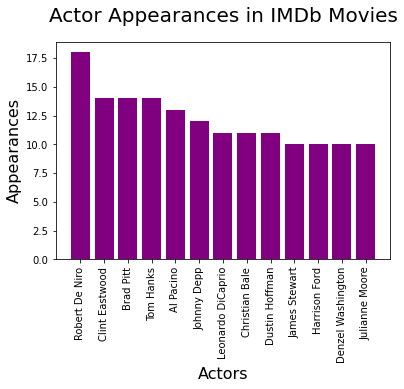

In [33]:
#Plot

plt.bar(actor_vc_top.index, actor_vc_top.values, color = 'purple')

plt.xticks(rotation = 90)
plt.xlabel('Actors', fontsize = 16)
plt.ylabel('Appearances', fontsize = 16)
plt.title('Actor Appearances in IMDb Movies', fontsize = 20, pad = 20);


